<a href="https://colab.research.google.com/github/LinaHu1990/Assignments/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Final Assignment - CO2 Emissions


In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

In [7]:
# Import data
# Clean data by drop rows with NAN values

def CO2_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
  df = pd.DataFrame(url)
  df_clean = df.dropna()
  return df_clean

df_CO2 = CO2_clean()

#print(df_CO2)


In [ ]:
# Dataframe shows two variables that measure CO2 output per capita respectively co2_per_capita and consumption_co2_per_capita
# Calculate correlation between co2_per_capita and other variables
# Calculate correlation between consumption_co2_per_capita and other variables

corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)

# Both result show a high correlation with energy_per_capita
print(corr_co2.head(10))

co2_per_capita                   1.000000
ghg_excluding_lucf_per_capita    0.917498
co2_including_luc_per_capita     0.893064
ghg_per_capita                   0.861279
consumption_co2_per_capita       0.827985
energy_per_capita                0.757294
oil_co2_per_capita               0.708310
coal_co2_per_capita              0.684652
gas_co2_per_capita               0.601348
other_co2_per_capita             0.484730
Name: co2_per_capita, dtype: float64


<ipython-input-8-5f301c97f1f6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_co2 = df_CO2.corr()['co2_per_capita'].abs().sort_values(ascending=False)
<ipython-input-8-5f301c97f1f6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cons = df_CO2.corr()['consumption_co2_per_capita'].abs().sort_values(ascending=False)


In [ ]:
# Test statistical significance

r_co2 = pearsonr(df_CO2['co2_per_capita'], df_CO2['energy_per_capita'])

print (r_co2)

PearsonRResult(statistic=0.7572942206048902, pvalue=3.2402119916331483e-230)


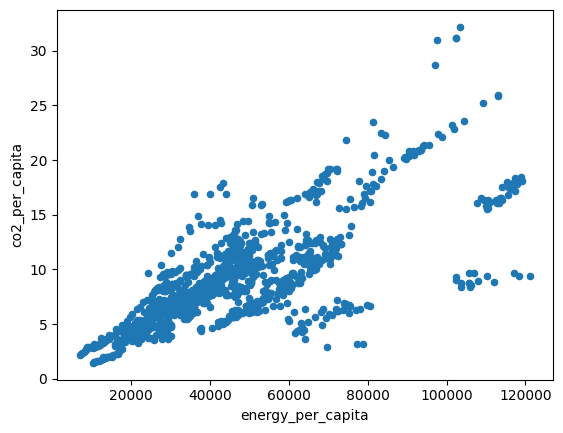

In [ ]:
graph = df_CO2.plot(x= 'energy_per_capita', y = 'co2_per_capita', kind = 'scatter')
plt.show()

## Answer to Question 1
The biggest predictor of a large CO2 output per capita of a country is the energy consumption per capita. There is a positive relation between both variables, meaning a higher energy consumption per capita will most likely increase the co2 output per capita. The pvalue < 0.05 and is considered to be statistically significant

## Discussion Question 1


Correlation Result for co2_per_capita show a high correlation between variables that provide an alternate definition to measure co2 per capita. These values are not taken into account in order to provide an answer. The highest variable that has a high correlation with co2_per_capita is energy_per_capita.  


## Question 2 Which countries are making the biggest strides in decreasing CO2 output?

In [27]:
# Sort dataset by year ascending
df_CO2_sorted = df_CO2.sort_values(by='year', ascending=True)

# Group dataset by country
grouped = df_CO2_sorted.groupby('country')

# Calculate the difference between the last and first co2_per_capita value per country
# This should give the absolute decrease for a country in the given timeperiod
diff = grouped['co2_per_capita'].last() - grouped['co2_per_capita'].first()

print(diff.sort_values(ascending=True).head(3))


country
Luxembourg   -15.273
Estonia       -9.942
Ukraine       -8.470
Name: co2_per_capita, dtype: float64


In [29]:
# Calculate the relatively change in %

relative_change_percentage = (grouped['co2_per_capita'].last() - grouped['co2_per_capita'].first()) / grouped['co2_per_capita'].first() * 100
print(relative_change_percentage.sort_values(ascending= True).head(3))

country
Ukraine     -61.906154
Malta       -51.968864
Lithuania   -49.618967
Name: co2_per_capita, dtype: float64


## Answer to Question 2:

Top 3 countries that show the biggest decrease in co2 per capita in absolute terms are:

1.   Luxembourg
2.   Estonia
3.   Ukraine

The countries with the relative biggest decrease are:

1.   Ukraine
2.   Malta
3.   Lithuania









## Discussion Question 2

The answer is showing which countries have decreased the co2_per_capita the most. It is not providing context if this decrease is a result of intentional measures by a country or a result of external factors.


## Question 3 Which non-fossil fuel energy technology will have the best price in the future?

In [47]:
# Import data with cost of energy for alternative sources of energy
# Rename column names

def energy_clean():
  url = pd.read_csv('https://raw.githubusercontent.com/LinaHu1990/Assignments/main/levelized-cost-of-energy.csv')
  df = pd.DataFrame(url)
  #df_clean = df.dropna() #most countries don't have a price for the energy sources
  return df

df_energy = energy_clean()
df_energy.columns = df_energy.columns.str.replace(' levelized cost of energy', '')

print(df_energy)

        Entity      Code  Year  Bioenergy  Geothermal  Offshore wind  \
0    Australia       AUS  2010        NaN         NaN            NaN   
1    Australia       AUS  2011        NaN         NaN            NaN   
2    Australia       AUS  2012        NaN         NaN            NaN   
3    Australia       AUS  2013        NaN         NaN            NaN   
4    Australia       AUS  2014        NaN         NaN            NaN   
..         ...       ...   ...        ...         ...            ...   
481      World  OWID_WRL  1995        NaN         NaN            NaN   
482      World  OWID_WRL  1996        NaN         NaN            NaN   
483      World  OWID_WRL  1997        NaN         NaN            NaN   
484      World  OWID_WRL  1998        NaN         NaN            NaN   
485      World  OWID_WRL  1999        NaN         NaN            NaN   

     Solar photovoltaic  Concentrated solar power  Hydropower  Onshore wind  
0              0.423957                       NaN        

In [54]:
# calculate average per year
energy_average = df_energy.groupby('Year').mean()

print (energy_average)

      Bioenergy  Geothermal  Offshore wind  Solar photovoltaic  \
Year                                                             
1983        NaN         NaN            NaN                 NaN   
1984        NaN         NaN            NaN                 NaN   
1985        NaN         NaN            NaN                 NaN   
1986        NaN         NaN            NaN                 NaN   
1987        NaN         NaN            NaN                 NaN   
1988        NaN         NaN            NaN                 NaN   
1989        NaN         NaN            NaN                 NaN   
1990        NaN         NaN            NaN                 NaN   
1991        NaN         NaN            NaN                 NaN   
1992        NaN         NaN            NaN                 NaN   
1993        NaN         NaN            NaN                 NaN   
1994        NaN         NaN            NaN                 NaN   
1995        NaN         NaN            NaN                 NaN   
1996      

<ipython-input-54-ba3ca011c742>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy_average = df_energy.groupby('Year').mean()


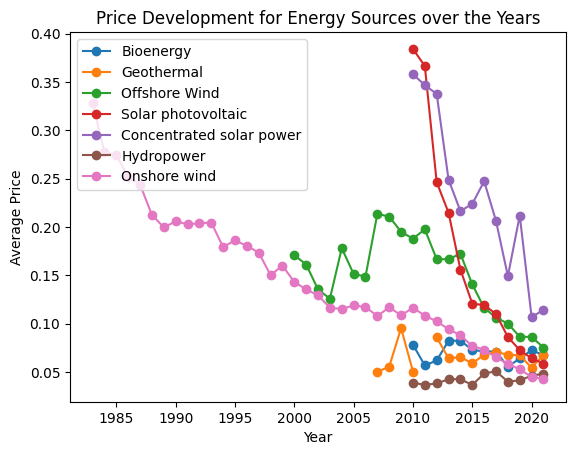

In [60]:
# Plot the line chart for each energy source
x_values = energy_average.index
plt.plot(x_values, energy_average['Bioenergy'], label='Bioenergy', marker='o')
plt.plot(x_values, energy_average['Geothermal'], label='Geothermal', marker='o')
plt.plot(x_values, energy_average['Offshore wind'], label='Offshore Wind', marker='o')
plt.plot(x_values, energy_average['Solar photovoltaic'], label='Solar photovoltaic', marker='o')
plt.plot(x_values, energy_average['Concentrated solar power'], label='Concentrated solar power', marker='o')
plt.plot(x_values, energy_average['Hydropower'], label='Hydropower', marker='o')
plt.plot(x_values, energy_average['Onshore wind'], label='Onshore wind', marker='o')

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.title('Price Development for Energy Sources over the Years')

# Show the plot
plt.show()